In [8]:
#Time Series Analysis
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
time_data = pd.read_excel("./EDA_DATA/daily-minimum-temperatures.xlsx")
time_data.head()

,Date,Daily minimum temperatures
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [6]:
#changing name of column for easier access
time_data.columns = ["Date","Min_temp"]
time_data.head()

,Date,Min_temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [7]:
#checking date column is timestamp or not
time_data.dtypes

Date        datetime64[ns]
Min_temp           float64
dtype: object

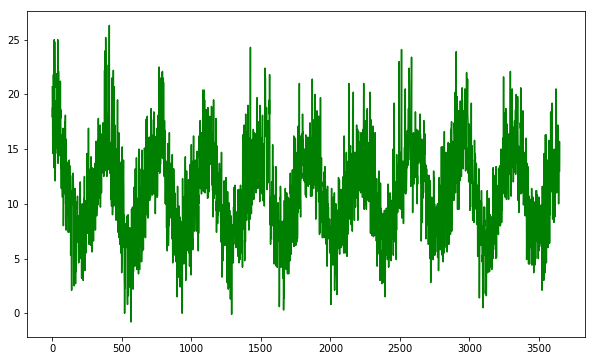

In [18]:
plt.rcParams["figure.figsize"]=10,6
time_data.Min_temp.plot(kind="line",x="Date",y="Min_temp",color="g")

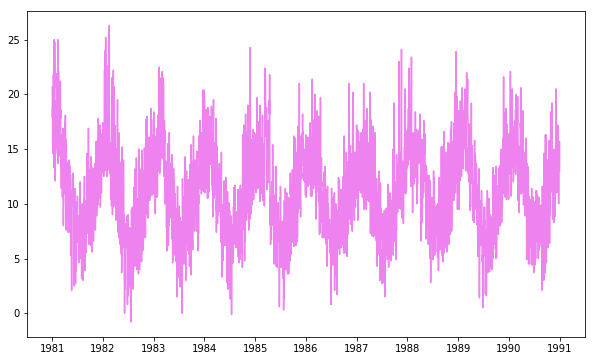

In [21]:
plt.plot("Date","Min_temp",data=time_data,color="violet")
#plt.plot("Date","Humidity",data=time_data)
plt.show()

In [38]:
#plotting the heatmap

time_data["Year"] = time_data.Date.dt.year
time_data["Month"] = time_data.Date.dt.month_name()
time_data["Day"] = time_data.Date.dt.day

In [39]:
time_data.head()

,Date,Min_temp,Year,Month,Day
0,1981-01-01,20.7,1981,January,1
1,1981-01-02,17.9,1981,January,2
2,1981-01-03,18.8,1981,January,3
3,1981-01-04,14.6,1981,January,4
4,1981-01-05,15.8,1981,January,5


In [24]:
long = time_data.groupby(["Month","Year"])["Min_temp"].mean().reset_index()
long.head()

,Month,Year,Min_temp
0,April,1981,12.356667
1,April,1982,11.470000
2,April,1983,10.596667
3,April,1984,10.750000
4,April,1985,12.976667


In [25]:
wide = long.pivot("Month","Year","Min_temp")
wide

Year,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990
Month,,,,,,,,,,
April,12.356667,11.470000,10.596667,10.750000,12.976667,11.653333,12.250000,12.833333,12.563333,13.433333
August,7.238710,7.903226,8.706452,8.696774,7.635484,7.387097,8.022581,8.725806,6.770968,7.825806
December,13.680645,13.754839,14.396774,12.643333,14.109677,12.935484,13.254839,15.436667,13.951613,14.367742
February,17.678571,15.921429,16.807143,14.944828,14.032143,14.196429,13.889286,14.524138,16.371429,15.417857
January,17.712903,16.567742,13.180645,14.309677,14.219355,13.825806,13.235484,16.493548,15.180645,15.577419
July,7.577419,4.577419,6.890323,5.980645,6.135484,6.961290,5.983871,8.232258,6.332258,8.183871
June,7.306667,5.606667,6.600000,7.730000,7.073333,7.526667,8.273333,8.386667,6.560000,7.720000
March,13.500000,14.935484,15.777419,12.867742,15.877419,14.690323,12.619355,14.748387,15.803226,14.835484
May,9.490323,9.583871,10.116129,8.112903,9.419355,10.274194,9.806452,11.387097,10.725806,9.748387


In [26]:
#reordering month
month = ["January","February","March","April","May","June","July","August","September","October","November","December"]

new_wide = wide.reindex(month)
new_wide.head()

Year,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990
Month,,,,,,,,,,
January,17.712903,16.567742,13.180645,14.309677,14.219355,13.825806,13.235484,16.493548,15.180645,15.577419
February,17.678571,15.921429,16.807143,14.944828,14.032143,14.196429,13.889286,14.524138,16.371429,15.417857
March,13.500000,14.935484,15.777419,12.867742,15.877419,14.690323,12.619355,14.748387,15.803226,14.835484
April,12.356667,11.470000,10.596667,10.750000,12.976667,11.653333,12.250000,12.833333,12.563333,13.433333
May,9.490323,9.583871,10.116129,8.112903,9.419355,10.274194,9.806452,11.387097,10.725806,9.748387


In [27]:
#plotting heatmap
#importing library called seaborn
import seaborn as sns

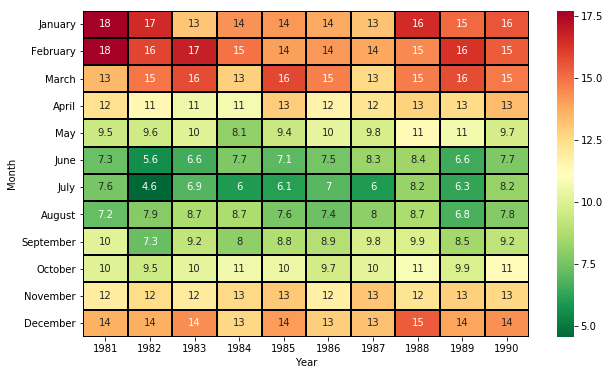

In [37]:
sns.heatmap(new_wide,cmap="RdYlGn_r",linewidths=1,annot=True,linecolor="black")

In [40]:
long1 = time_data.groupby(["Month","Day"])["Min_temp"].mean().reset_index()
long1.head()

,Month,Day,Min_temp
0,April,1,13.43
1,April,2,13.05
2,April,3,13.12
3,April,4,13.69
4,April,5,14.25


In [42]:
wide1 = long1.pivot("Month","Day","Min_temp")
month = ["January","February","March","April","May","June","July","August","September","October","November","December"]

new_wide1 = wide1.reindex(month)
new_wide1.head()

Day,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
Month,,,,,,,,,,,,,,,,,,,,,
January,15.85,15.28,14.69,14.04,13.85,13.66,14.75,14.92,15.19,15.45,...,14.11,14.16,14.53,14.80,14.99,14.99,14.79,15.69,16.31,14.79
February,15.09,13.99,14.53,15.55,14.22,14.73,15.36,17.03,16.41,14.71,...,15.60,14.57,13.83,14.54,14.46,15.18,16.06,14.90,NaN,NaN
March,16.04,15.96,15.28,15.82,16.36,16.50,15.28,15.36,14.25,13.64,...,15.44,15.16,14.57,13.08,13.43,13.54,13.24,13.12,13.93,13.44
April,13.43,13.05,13.12,13.69,14.25,13.62,13.06,11.61,11.80,12.03,...,11.53,11.10,11.73,11.21,10.05,11.72,11.78,10.88,10.73,NaN
May,11.23,11.83,11.36,11.67,11.39,11.43,9.85,9.64,9.55,11.01,...,7.41,9.06,10.00,9.47,9.44,8.90,9.59,10.01,9.83,9.08


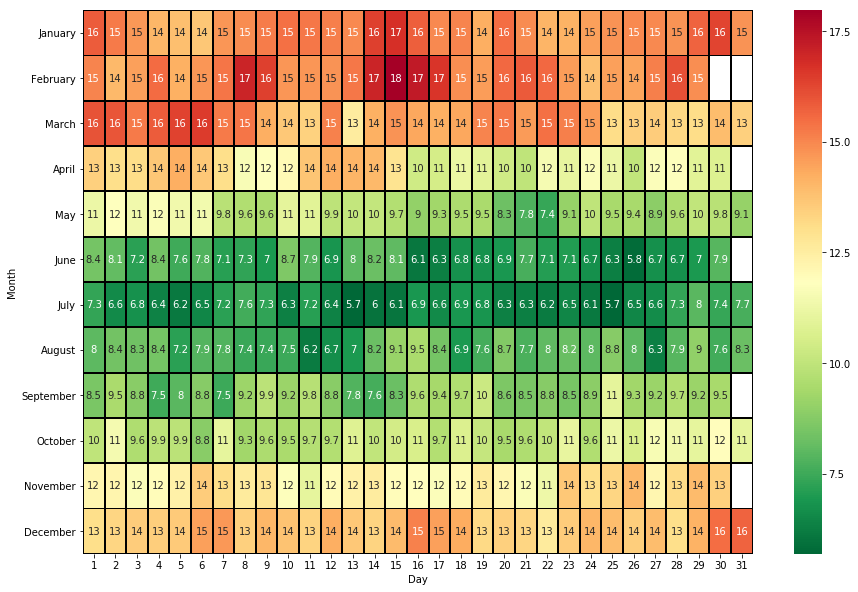

In [44]:
plt.rcParams["figure.figsize"]=15,10
sns.heatmap(new_wide1,cmap="RdYlGn_r",linewidths=1,annot=True,linecolor="black")